<h1><center>Metody numeryczne i optymalizacja</center></h1>

<h3><center>Lista 5</center></h3>
<h3><center>METODY ITERACYJNE</center></h3>



<h6><center>Antoni Bezdzietny 249327</center></h6>

<h6><center>Paweł Krysa 249171</center></h6>

<h6><center>10.05.2022</center></h6>

In [2]:
import numpy as np
import scipy.linalg as sp
import time
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

## Wprowadzenie
---
Liniowe metody iteracyjnestosowane są do iteracyjnej aproksymacji rozwiązania układu równań liniowych:
$$
\boldsymbol{Ax=b}
$$

---
Wszystkie poniżej zaimplementowane algorytmy iteracyjne zailmplementowano zgonie z wzorami podanymi na wykładnie.

Bazując na:
$$
\boldsymbol{x}_{k+1}=\boldsymbol{Gx}_k+\boldsymbol{c}
$$
gdzie:
$$
\boldsymbol{G}=\boldsymbol{S}^{-1}\boldsymbol{T}=\boldsymbol{I-S}^{-1}\boldsymbol{A}
$$
$$
\boldsymbol{c}=\boldsymbol{S}^{-1}\boldsymbol{b}
$$

W każdej z metod różnica polegała na zmianie wyznaczenia macierzy $\boldsymbol{S}$ oraz $\boldsymbol{T}$.

W przypadku metody Jacobiego przy implementacji wykorzystano możliwość mnożenia wektorowego o złożoności $O(n^2)$.


---
Wyjątek stanowi metoda Kaczmarza w której przestrzeń dzeielona jest na wektory wierszowe. W tym przypadku skorzystano z wzoru.
$$
\boldsymbol{X}_{k+1}=\boldsymbol{x}_k+\alpha \frac{b_i-\underline{\boldsymbol{a}}_i \boldsymbol{x}_k}{||\underline{\boldsymbol{a}}_i||^2_2}\underline{\boldsymbol{a}}_i^T
$$

In [4]:
def Landweber(A, b, iter_=30, alp_=None):
    """
    Implementacja metody iteracyjnej Landwebera
    Parameters
    ----------
    A : numpy.array (matrix) - equation matrix
    b : numpy.array (vector) - const vector
    alp_  : relaxation parameter alp_>0 
    iter_ : number of iteration
    
    Returns
    ----------
    x : numpy.array (vector) - solve for n-th itereations
    """
    # Set relaxation parameter if not given: alp=1/|max(eigA.T A)| 
    if alp_ == None:
        alp_ = 2 / np.abs(np.max(np.linalg.eig(A.T@A)[0]))  
    
    x = np.zeros( (iter_, A.shape[1], 1) )   

    for i in range(iter_):
        G = np.eye(A.shape[1]) - alp_*A.T@A
        c = alp_*A.T@b
        x[i] = G@x[i-1]+c
    return x

In [5]:
def GaussSeidel(A, b, iter_=30):
    """
    Implementacja metody iteracyjnej Gaussa-Sidela
    Parameters
    ----------
    A : numpy.array (matrix) - equation matrix
    b : numpy.array (vector) - const vector
    iter_ : number of iteration
    
    Returns
    ----------
    x : numpy.array (vector) - solve for n-th itereations
    """
    x = np.zeros( (iter_, A.shape[1], 1) )
    invS = np.linalg.inv(np.tril(A, 0))
    T = -np.triu(A, 1)
    
    for i in range(iter_):
        G = invS@T
        c = invS@b
        x[i] = G@x[i-1]+c
    return x

In [6]:
def Jacobi(A, b, iter_=30):
    """
    Implementacja metody iteracyjnej Jacobiego
    Parameters
    ----------
    A : numpy.array (matrix) - equation matrix
    b : numpy.array (vector) - const vector
    iter_ : number of iteration
    
    Returns
    ----------
    x : numpy.array (vector) - solve for n-th itereations
    """
    x = np.zeros( (iter_, A.shape[1], 1) )
    invS = np.reciprocal(np.diag(A))[np.newaxis]
    T = -A+np.diag(np.diag(A))    
    
    for i in range(iter_):
        G = invS*T
        c = invS.T*b
        x[i] = G@x[i-1]+c
    return x

In [7]:
def SuccessiveOverRelaxation(A, b, omeg_=1, iter_=30):
    """
    Implementacja metody iteracyjnej Successive Over-Relaxation (SOR)
    Parameters
    ----------
    A : numpy.array (matrix) - equation matrix
    b : numpy.array (vector) - const vector
    omeg_ : relaxation parametr omeg_ in (0,2)
    iter_ : number of iteration
    
    Returns
    ----------
    x : numpy.array (vector) - solve for n-th itereations
    """ 
    x = np.zeros( (iter_, A.shape[1], 1) )
    invS = np.linalg.inv( np.tril(A,-1) + (1/omeg_)*np.diag(np.diag(A)) )
    T = -(np.triu(A,1)+ ((omeg_-1)/omeg_)*np.diag(np.diag(A)))
    
    for i in range(iter_):
        G = invS@T
        c = invS@b
        x[i] = G@x[i-1]+c
    return x

In [8]:
def SteepestDescen(A, b, iter_=30):
    """
    Implementacja metody iteracyjnej SteepestDescen (SD)
    Parameters
    ----------
    A : numpy.array (matrix) - equation matrix
    b : numpy.array (vector) - const vector
    iter_ : number of iteration
    
    Returns
    ----------
    x : numpy.array (vector) - solve for n-th itereations
    """
    x = np.zeros( (iter_, A.shape[1], 1) )
    
    for i in range(iter_):
        r = b-A@x[i-1]
        g = -A.T@r
        w = A@g
        alp_ = (g.T@g)/(w.T@w)
        x[i] = x[i-1]-alp_*g
    return x

In [9]:
def Kaczmarz(A, b, alp_=1, iter_ = 30):
    """
    Implementacja metody iteracyjnej Kaczmarza
    Parameters
    ----------
    A : numpy.array (matrix) - equation matrix
    b : numpy.array (vector) - const vector
    alp_ : relaxation parametr alp_ (0,2)
    iter_ : number of iteration
    
    Returns
    ----------
    x : numpy.array (vector) - solve for n-th itereations
    """
    
    x = np.zeros( (iter_, A.shape[1], 1) )
    l = np.power(np.linalg.norm(A, axis=1), 2)
    
    for j in range(iter_):
        x[j] = x[j-1]
        for i in range(A.shape[0]):
            x[j] += alp_*((b[i]-A[i,:]@x[j])/l[i])*A[[i],:].T
    return x

In [10]:
def designateParameters(X,A,b,x_solve):
    error = {}
    error['Solve'] = np.linalg.norm(X-x_solve, axis=1)
    error['Residual'] = np.linalg.norm(b-A@X, axis=1)
    temp = np.append(np.zeros(x_solve.shape), X)
    temp = temp[:temp.size-x_solve.size].reshape(X.shape[0], X.shape[1], X.shape[2])
    error['Convergence'] = np.linalg.norm(temp-X, axis=1)
    return error

In [11]:
def testMethods(A,b,x_solve,iter_=30):
    methods = {}
    methods['Landweber'] = {} 
    methods['GaussSeidel'] = {}
    methods['Jacobi'] = {}
    methods['SuccessiveOverRelaxation'] = {}
    methods['SteepestDescen'] = {}
    methods['Kaczmarz'] = {}
    
    #Function pointers
    methods['Landweber']['Fun'] = Landweber
    methods['GaussSeidel']['Fun'] = GaussSeidel
    methods['Jacobi']['Fun'] = Jacobi
    methods['SuccessiveOverRelaxation']['Fun'] = SuccessiveOverRelaxation
    methods['SteepestDescen']['Fun'] = SteepestDescen
    methods['Kaczmarz']['Fun'] = Kaczmarz
    
    for m in methods:
        start_ns = time.time_ns()
        methods[m]['Value'] = methods[m]['Fun'](A,b,iter_=iter_)
        methods[m]['Time']  = time.time_ns() -start_ns
        methods[m]['Error'] = designateParameters(methods[m]['Value'],A,b,x_solve)
    
    return methods

In [12]:
def drawPlots(methods, log=False):
    for m in methods:
        if log == False:
            plt.plot(range(methods[m]['Value'].shape[0]),methods[m]['Error']['Residual'], label=m)
        else:
            plt.semilogy(range(methods[m]['Value'].shape[0]),methods[m]['Error']['Residual'], label=m)
    plt.title("Błąd Residualny")
    plt.grid()
    plt.legend()
    plt.show()
    
    for m in methods:
        if log == False:
            plt.plot(range(methods[m]['Value'].shape[0]),methods[m]['Error']['Solve'], label=m)
        else:
            plt.semilogy(range(methods[m]['Value'].shape[0]),methods[m]['Error']['Solve'], label=m)
    plt.title("Błąd Rozwiązania")
    plt.grid()
    plt.legend()
    plt.show()
    
    for m in methods:
        if log == False:
            plt.plot(range(methods[m]['Value'].shape[0]),methods[m]['Error']['Convergence'], label=m)
        else:
            plt.semilogy(range(methods[m]['Value'].shape[0]),methods[m]['Error']['Convergence'], label=m)
    plt.title("Kowergencja")
    plt.grid()
    plt.legend()
    plt.show()

---
## Zadanie 1

Rozwiązać następujący układ równań przy pomocy wybranych metod iteracyjnych:

$$
\left\{\begin{matrix}
2u & -v &  &  & =0\\ 
-u & +2v & -z &  & =0\\ 
 & -v & +2w & -z & =0\\ 
 &  & -w & +2z & =5
\end{matrix}\right.
$$
Rozpocząć proces iteracyjny od zerowej wartości początkowej. Przedstaw krzywe błędów residualnych i aproksymacji rozwiązania (dwa rysunki). Porównaj z rozwiązaniem uzyskanym z eliminacji Gaussa.


Rozwiązanie dokładne:
[[1.]
 [2.]
 [3.]
 [4.]]

Wskaźnik uwarunkowania macierzy 9.472135954999578

Wyniki uzyskane metodą Landweber, w 50 iteracjach:
[[0.60495547]
 [0.74277049]
 [2.36080443]
 [3.22298937]]
Czas wykonania 50 iteracji: 2773.773 ms

Wyniki uzyskane metodą GaussSeidel, w 50 iteracjach:
[[1.]
 [2.]
 [3.]
 [4.]]
Czas wykonania 50 iteracji: 1246.626 ms

Wyniki uzyskane metodą Jacobi, w 50 iteracjach:
[[0.99995955]
 [1.99991911]
 [2.99993456]
 [3.99995001]]
Czas wykonania 50 iteracji: 1060.945 ms

Wyniki uzyskane metodą SuccessiveOverRelaxation, w 50 iteracjach:
[[1.]
 [2.]
 [3.]
 [4.]]
Czas wykonania 50 iteracji: 823.804 ms

Wyniki uzyskane metodą SteepestDescen, w 50 iteracjach:
[[0.40371906]
 [1.01520386]
 [2.03519703]
 [3.39136242]]
Czas wykonania 50 iteracji: 800.584 ms

Wyniki uzyskane metodą Kaczmarz, w 50 iteracjach:
[[0.82145668]
 [1.74549068]
 [2.77948961]
 [3.8897448 ]]
Czas wykonania 50 iteracji: 3748.867 ms


 Parametry: alpha=1 dla metody Kaczmarza, omega=1 dla 

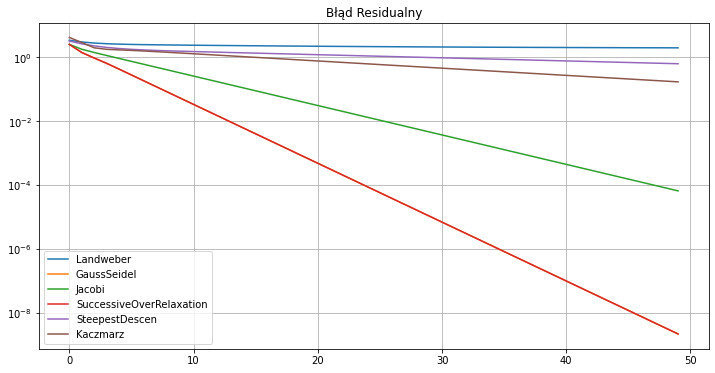

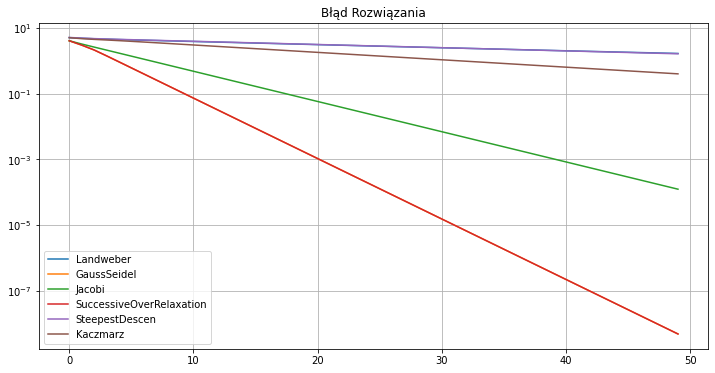

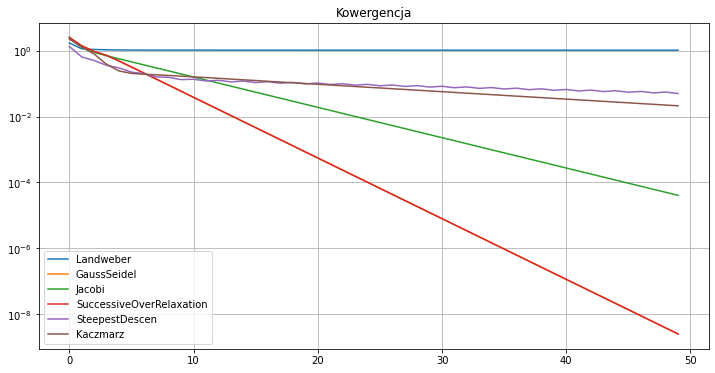

In [57]:
A = np.array([[2,-1,0,0],
              [-1,2,-1,0],
              [0,-1,2,-1],
              [0,0,-1,2]],dtype=np.double)
b = np.array([0,0,0,5],
             dtype=np.double).reshape(4,1)
x_solve = np.linalg.inv(A)@b

iterative_methods = testMethods(A,b,x_solve,50)

print("Rozwiązanie dokładne:")
print(x_solve)
print()

print(f'Wskaźnik uwarunkowania macierzy {np.linalg.cond(A)}')
print()

for m in iterative_methods:
    iter_ = iterative_methods[m]['Value'].shape[0]
    print(f"Wyniki uzyskane metodą {m}, w {iter_} iteracjach:")
    print(iterative_methods[m]['Value'][iter_-1])
    print(f'Czas wykonania {iter_} iteracji: {iterative_methods[m]["Time"]/1000} ms')
    print()
    
print("\n Parametry: alpha=1 dla metody Kaczmarza, omega=1 dla metody Steepest-Descen")

drawPlots(iterative_methods, True)

### Wnioski

Na podstawie powyższych wykresów oraz uzyskanych wyników, przy dobrze uwarunkowanej macierzy tj. cond(A) = 9.472 oraz przy niewielkich rozmiarach macierzy metoda SOR oraz GaussSeidel, zapewnia największą zbieżność (błąd residualny na poziomie $10^{-8}$). Metoda SOR wymaga mniejszej złożoności obliczeniowej, przez co jest preferowana. Metoda Jacobiego wymaga najmniejszej złożoności obliczeniowej dzięki implementacji wektorowej O($n^2$), zamiast macierzowej O($n^3$).

Pozostałe algorytmy dostarczają wyników o znaczniej większym błędzie.

---
## Zadanie 2

Rozwiązać następujący układ równań przy pomocy wybranych metod iteracyjnych:
$$
\left\{\begin{matrix}
x_1 & + & x_2 & + & x_3 & = & 1\\ 
x_1 & + & x_2 & + & 2x_3 & = & 2\\ 
x_1 & + & 2x_2 & + & 2x_3 & = & 1
\end{matrix}\right.
$$
Rozpocznij iteracje od x(0) = 0 . Przedstaw krzywe błędów residualnych i aproksymacji rozwiązania (dwa rysunki). Porównaj z rozwiązaniem uzyskanym z eliminacji Gaussa. Uzasadnij matematycznie (na podstawie promienia zbieżności) dlaczego nie udaje się uzyskać zbieżności niektórymi metodami iteracyjnymi.


Rozwiązanie dokładne:
[[ 1.]
 [-1.]
 [ 1.]]

Wskaźnik uwarunkowania macierzy 10.289691944499424

Wyniki uzyskane metodą Landweber, w 50 iteracjach:
[[ 0.53923812]
 [-1.11872456]
 [ 0.59660281]]
Czas wykonania 50 iteracji: 1260.736 ms

Wyniki uzyskane metodą GaussSeidel, w 50 iteracjach:
[[ 1.00000000e+00]
 [ 1.12589991e+15]
 [-1.12589991e+15]]
Czas wykonania 50 iteracji: 610.983 ms

Wyniki uzyskane metodą Jacobi, w 50 iteracjach:
[[-5.07504082e+15]
 [-6.44485454e+15]
 [-8.51776005e+15]]
Czas wykonania 50 iteracji: 512.252 ms

Wyniki uzyskane metodą SuccessiveOverRelaxation, w 50 iteracjach:
[[ 1.00000000e+00]
 [ 1.12589991e+15]
 [-1.12589991e+15]]
Czas wykonania 50 iteracji: 611.973 ms

Wyniki uzyskane metodą SteepestDescen, w 50 iteracjach:
[[ 0.99999995]
 [-1.        ]
 [ 1.00000002]]
Czas wykonania 50 iteracji: 1020.595 ms

Wyniki uzyskane metodą Kaczmarz, w 50 iteracjach:
[[ 1.02534511]
 [-1.00095041]
 [ 0.98827786]]
Czas wykonania 50 iteracji: 3410.056 ms


 Parametry: alpha=1 dla

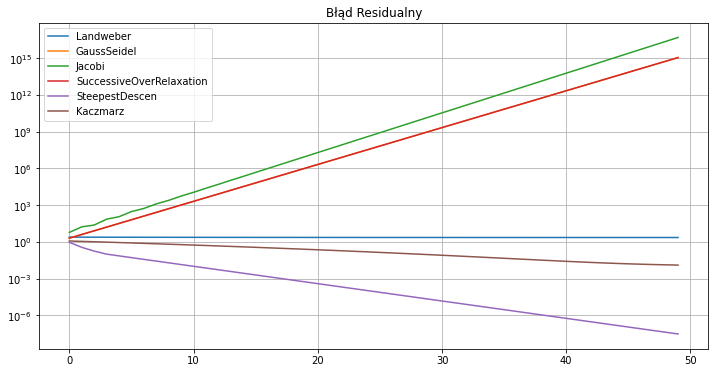

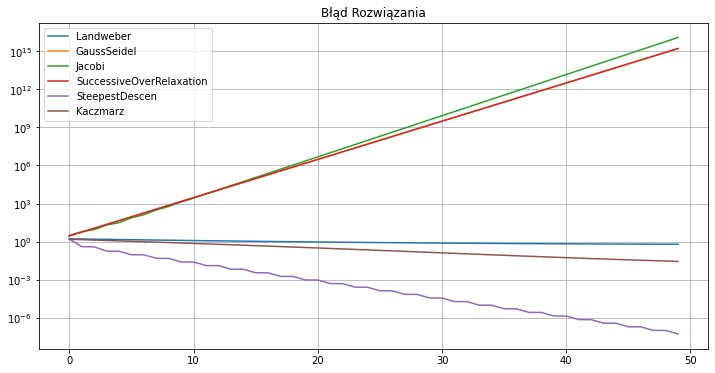

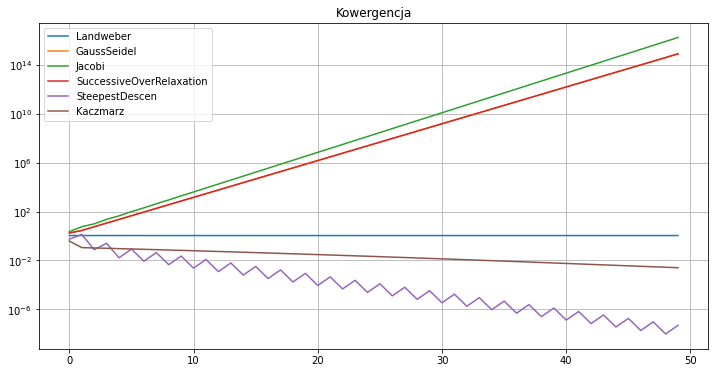

In [58]:
A = np.array([[1,1,1],
              [1,1,2],
              [1,2,2]],dtype=np.double)
b = np.array([1,2,1],
             dtype=np.double).reshape(3,1)
x_solve = np.linalg.inv(A)@b

iterative_methods = testMethods(A,b,x_solve,50)

print("Rozwiązanie dokładne:")
print(x_solve)
print()

print(f'Wskaźnik uwarunkowania macierzy {np.linalg.cond(A)}')
print()

for m in iterative_methods:
    iter_ = iterative_methods[m]['Value'].shape[0]
    print(f"Wyniki uzyskane metodą {m}, w {iter_} iteracjach:")
    print(iterative_methods[m]['Value'][iter_-1])
    print(f'Czas wykonania {iter_} iteracji: {iterative_methods[m]["Time"]/1000} ms')
    print()
    
print("\n Parametry: alpha=1 dla metody Kaczmarza, omega=1 dla metody Steepest-Descen")

drawPlots(iterative_methods, log=True)

#### Zamiana wierszy tak by macierz A była przekątniowo dominująca

Rozwiązanie dokładne:
[[ 1.]
 [-1.]
 [ 1.]]

Wskaźnik uwarunkowania macierzy 10.289691944499424

Wyniki uzyskane metodą Landweber, w 50 iteracjach:
[[ 0.53923812]
 [-1.11872456]
 [ 0.59660281]]
Czas wykonania 50 iteracji: 1527.157 ms

Wyniki uzyskane metodą GaussSeidel, w 50 iteracjach:
[[ 1.00000006]
 [-1.        ]
 [ 0.99999997]]
Czas wykonania 50 iteracji: 663.173 ms

Wyniki uzyskane metodą Jacobi, w 50 iteracjach:
[[-13575249.96701062]
 [-21549369.45946581]
 [-17103745.08090321]]
Czas wykonania 50 iteracji: 391.622 ms

Wyniki uzyskane metodą SuccessiveOverRelaxation, w 50 iteracjach:
[[ 1.00000006]
 [-1.        ]
 [ 0.99999997]]
Czas wykonania 50 iteracji: 932.294 ms

Wyniki uzyskane metodą SteepestDescen, w 50 iteracjach:
[[ 0.99999995]
 [-1.        ]
 [ 1.00000002]]
Czas wykonania 50 iteracji: 1168.725 ms

Wyniki uzyskane metodą Kaczmarz, w 50 iteracjach:
[[ 0.9440229 ]
 [-1.01740494]
 [ 1.03669102]]
Czas wykonania 50 iteracji: 3682.777 ms


 Parametry: alpha=1 dla metody Kaczmar

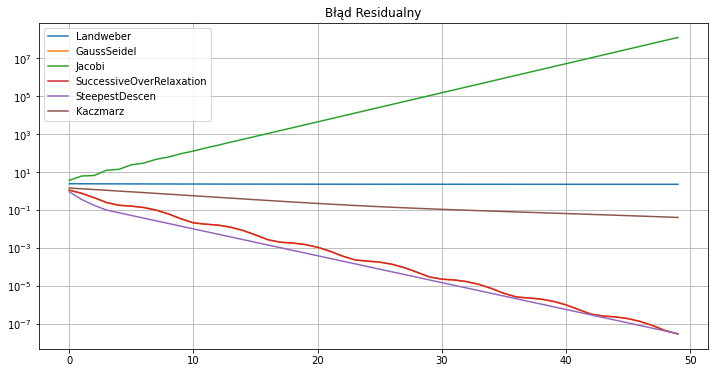

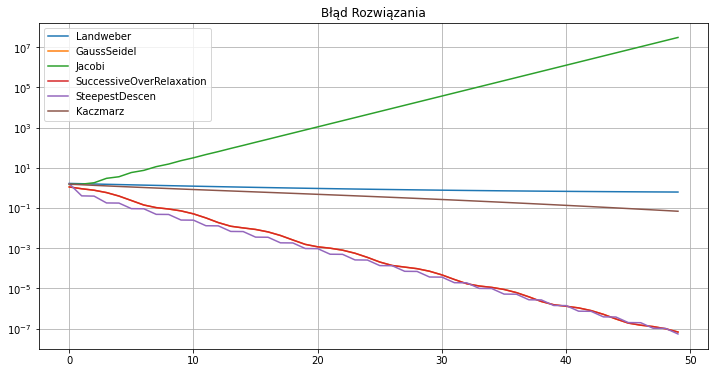

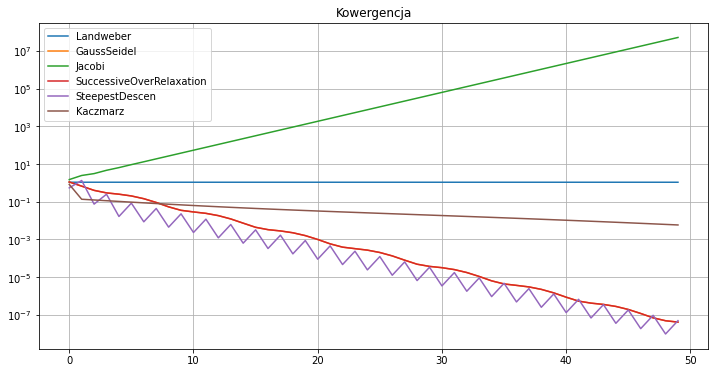

In [59]:
A = np.array([[1,1,1],
              [1,2,2],
              [1,1,2]],dtype=np.double)
b = np.array([1,1,2],
             dtype=np.double).reshape(3,1)
x_solve = np.linalg.inv(A)@b

iterative_methods = testMethods(A,b,x_solve,50)

print("Rozwiązanie dokładne:")
print(x_solve)
print()

print(f'Wskaźnik uwarunkowania macierzy {np.linalg.cond(A)}')
print()

for m in iterative_methods:
    iter_ = iterative_methods[m]['Value'].shape[0]
    print(f"Wyniki uzyskane metodą {m}, w {iter_} iteracjach:")
    print(iterative_methods[m]['Value'][iter_-1])
    print(f'Czas wykonania {iter_} iteracji: {iterative_methods[m]["Time"]/1000} ms')
    print()
    
print("\n Parametry: alpha=1 dla metody Kaczmarza, omega=1 dla metody Steepest-Descen")

drawPlots(iterative_methods, log=True)

### Wnioski

Jak można zauważyć metody SOR, GaussSeidel oraz Jacobi wymagają, aby macierz była przekątno dominująca. W tym celu najlepiej stosować metodę pivotingu, dzięki której algorytmy stają się algorytmami zbieżnymi. W przypadku pozostałych metod pivoting nie ma znaczącego wpływu na rozwiązanie. Pomimo macierzy A przekątno dominującej metoda Jacobiego pozostała rozbieżna.

---
## Zadanie 3

Rozwiąż układ równań liniowych: Ax = b , gdzie:
$$
A=
\begin{bmatrix}
1 &2  &3  &4 \\ 
-1 &1  &2  &1 \\ 
0 &2  &1  &3 \\ 
0 &0  &1  &1 
\end{bmatrix}
$$
$$
b = [1 ... 1]^T
$$

przy pomocy wybranych iteracyjnych algorytmów i porównać wyniki z eliminacją Gaussa. Rozpocząć iteracje od x(0)=0. Pokazać błąd residualny: $r^{(k)}= ||b - Ax^{(k)}||$ (jeden rysunek) oraz błąd aproksymacji: $||x^*-x^{(k)}||$ (drugi rysunek), gdzie rozwiązanie dokładne otrzymujemy metodą eliminacji Gaussa.


Rozwiązanie dokładne:
[[-1.00000000e+00]
 [-1.00000000e+00]
 [ 1.11022302e-16]
 [ 1.00000000e+00]]

Wskaźnik uwarunkowania macierzy 16.764255306701447

Wyniki uzyskane metodą Landweber, w 30 iteracjach:
[[-0.41488082]
 [-0.18319864]
 [ 0.10726542]
 [ 0.06508449]]
Czas wykonania 30 iteracji: 1006.547 ms

Wyniki uzyskane metodą GaussSeidel, w 30 iteracjach:
[[-1.06473213]
 [ 0.49158109]
 [-0.03236606]
 [ 1.03236606]]
Czas wykonania 30 iteracji: 319.313 ms

Wyniki uzyskane metodą Jacobi, w 30 iteracjach:
[[ 14698.21328445]
 [  4427.72019735]
 [-25542.820634  ]
 [ -4733.12761959]]
Czas wykonania 30 iteracji: 468.233 ms

Wyniki uzyskane metodą SuccessiveOverRelaxation, w 30 iteracjach:
[[-1.06473213]
 [ 0.49158109]
 [-0.03236606]
 [ 1.03236606]]
Czas wykonania 30 iteracji: 336.662 ms

Wyniki uzyskane metodą SteepestDescen, w 30 iteracjach:
[[-0.74366405]
 [-0.5935626 ]
 [ 0.09950257]
 [ 0.66537513]]
Czas wykonania 30 iteracji: 485.703 ms

Wyniki uzyskane metodą Kaczmarz, w 30 iteracjach:
[[

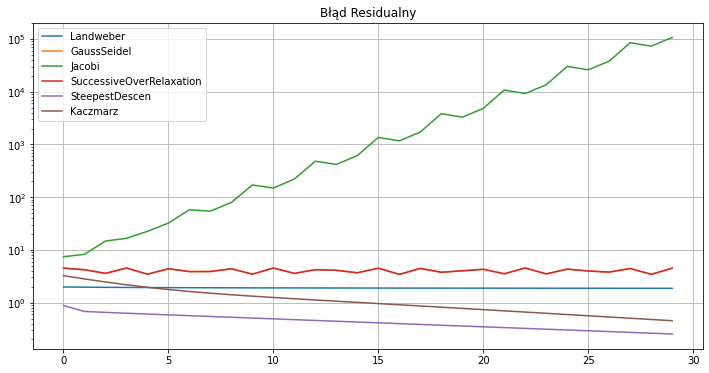

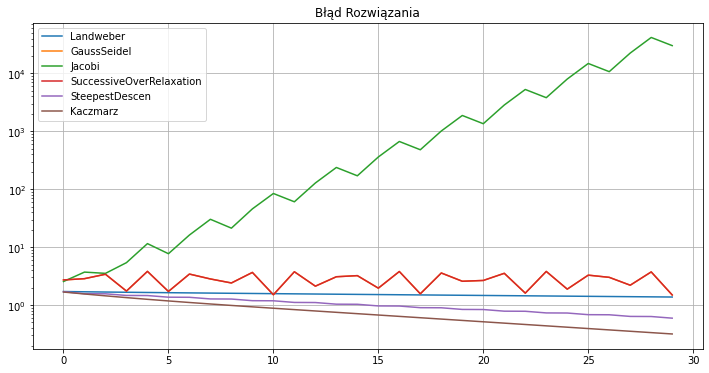

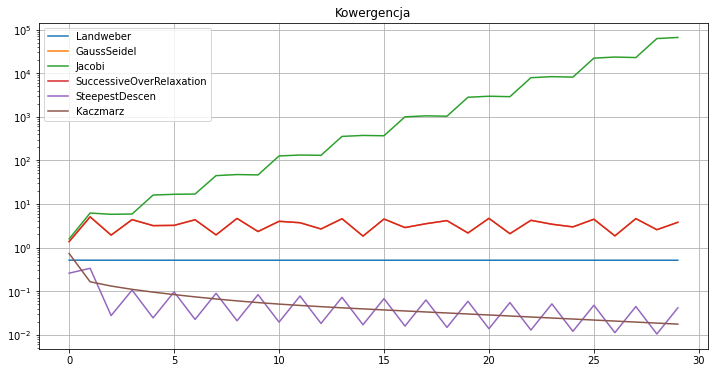

In [65]:
A = np.array([[1,2,3,4],
              [0,2,1,3],
              [-1,1,2,1],
              [0,0,1,1]],dtype=np.double)
b = np.array([1,1,1,1],
             dtype=np.double).reshape(4,1)
x_solve = np.linalg.inv(A)@b

iterative_methods = testMethods(A,b,x_solve,30)

print("Rozwiązanie dokładne:")
print(x_solve)
print()

print(f'Wskaźnik uwarunkowania macierzy {np.linalg.cond(A)}')
print()

for m in iterative_methods:
    iter_ = iterative_methods[m]['Value'].shape[0]
    print(f"Wyniki uzyskane metodą {m}, w {iter_} iteracjach:")
    print(iterative_methods[m]['Value'][iter_-1])
    print(f'Czas wykonania {iter_} iteracji: {iterative_methods[m]["Time"]/1000} ms')
    print()
    
print("\n Parametry: alpha=1 dla metody Kaczmarza, omega=1 dla metody Steepest-Descen")

drawPlots(iterative_methods, log=True)

### Wnioski

Zgodnie z przedstawionym w powyższym zadaniu wnioskiem, iż metody GaussSeidel oraz SOR osiągają zbieżność tylko w przypadku macierzy przekątno dominujących, podczas wprowadzania danych zamieniono wiersze, tak by macierz A spełniała ten warunek. Bez wykonania tego kroku algorytmy są rozbieżne. Jak można wywnioskować na podstawie tego, jak i poprzedniego zadania, pozostałe metody pomimo wolniejszej zbieżności, zachowują większą stabilność.

--- 
## Zadanie 4

Niech $A=[a_{ij}]\in R^{NxN}$ gdzie $a_{ij}=\frac{1}{i+k-1}$ (macierz Hilberta) oraz $b=[1...1]^T$. Rozwiąż układ równań $Ax=b$ dla N = 5, 10 i 20, stosując wybrane metody iteracyjne. Rozpocząć iteracje od x(0)=0 . Przedstaw krzywe błędu residualnego.

Czas wykonania dla macierzy o wymiarach 5x5:

Metoda Landweber czas wykonania: 1323.576 ms
Metoda GaussSeidel czas wykonania: 570.933 ms
Metoda Jacobi czas wykonania: 456.213 ms
Metoda SuccessiveOverRelaxation czas wykonania: 579.093 ms
Metoda SteepestDescen czas wykonania: 1024.096 ms
Metoda Kaczmarz czas wykonania: 5648.56 ms


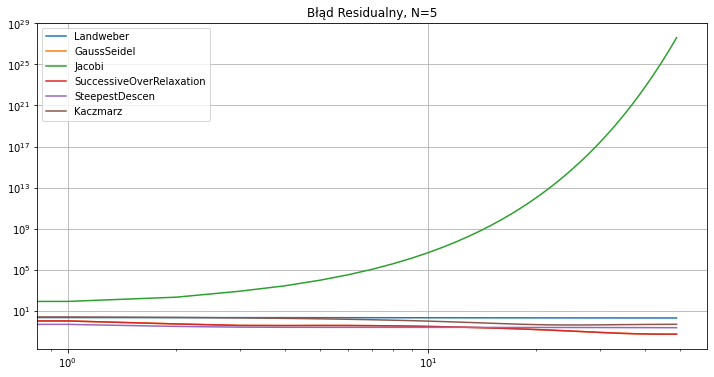

Czas wykonania dla macierzy o wymiarach 10x10:

Metoda Landweber czas wykonania: 1268.867 ms
Metoda GaussSeidel czas wykonania: 582.803 ms
Metoda Jacobi czas wykonania: 460.502 ms
Metoda SuccessiveOverRelaxation czas wykonania: 610.124 ms
Metoda SteepestDescen czas wykonania: 1039.335 ms
Metoda Kaczmarz czas wykonania: 11031.118 ms


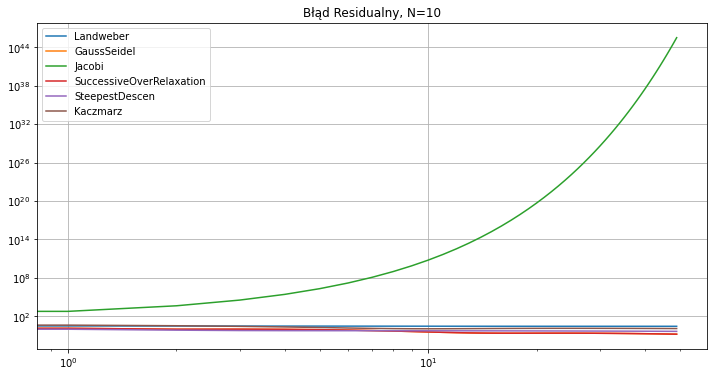

Czas wykonania dla macierzy o wymiarach 20x20:

Metoda Landweber czas wykonania: 1539.628 ms
Metoda GaussSeidel czas wykonania: 823.604 ms
Metoda Jacobi czas wykonania: 492.533 ms
Metoda SuccessiveOverRelaxation czas wykonania: 728.154 ms
Metoda SteepestDescen czas wykonania: 1116.626 ms
Metoda Kaczmarz czas wykonania: 25243.54 ms


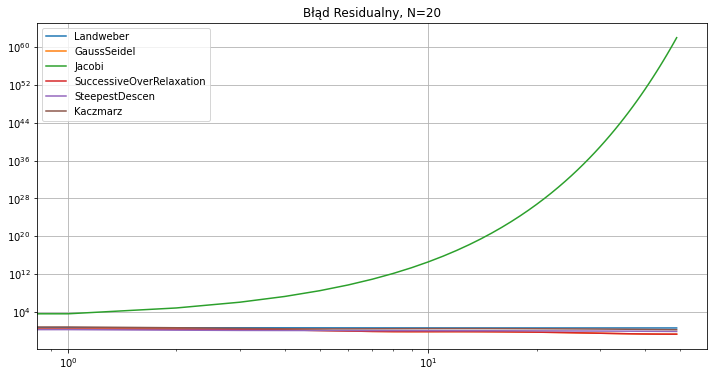

Czas wykonania dla macierzy o wymiarach 100x100:

Metoda Landweber czas wykonania: 24176.346 ms
Metoda GaussSeidel czas wykonania: 11231.489 ms
Metoda Jacobi czas wykonania: 2502.993 ms
Metoda SuccessiveOverRelaxation czas wykonania: 8104.272 ms
Metoda SteepestDescen czas wykonania: 5089.457 ms
Metoda Kaczmarz czas wykonania: 101266.916 ms


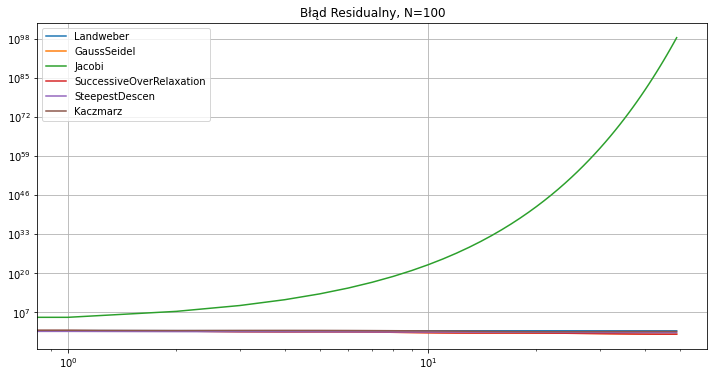

Czas wykonania dla macierzy o wymiarach 500x500:

Metoda Landweber czas wykonania: 405399.946 ms
Metoda GaussSeidel czas wykonania: 122407.776 ms
Metoda Jacobi czas wykonania: 26234.887 ms
Metoda SuccessiveOverRelaxation czas wykonania: 159154.566 ms
Metoda SteepestDescen czas wykonania: 44229.54 ms
Metoda Kaczmarz czas wykonania: 407912.239 ms


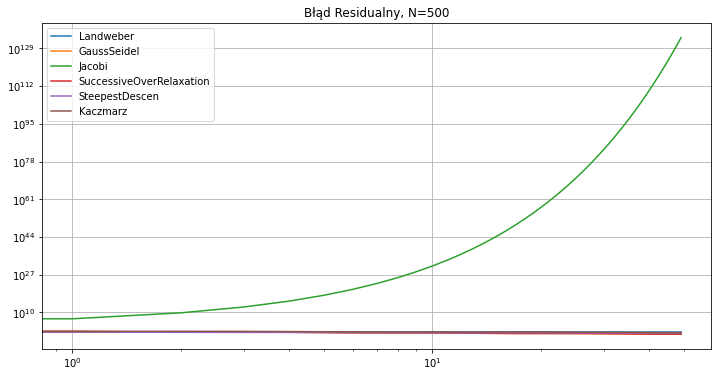

In [86]:
N = [5,10,20,100,500]
A = [sp.hilbert(n) for n in N]
b = [np.ones(n).reshape(n,1) for n in N]
x_solve = [np.linalg.inv(A[i])@b[i] for i in range(len(N))]

methods = [testMethods(A[i],b[i],x_solve[i],50) for i in range(len(N))]

for i in range(len(N)):
    print(f'Czas wykonania dla macierzy o wymiarach {N[i]}x{N[i]}:')
    print()
    for m in methods[i]:
        plt.loglog(range(methods[i][m]['Value'].shape[0]),methods[i][m]['Error']['Residual'], label=m)
        print(f'Metoda {m} czas wykonania: {methods[i][m]["Time"]/1000} ms')
    plt.title(f'Błąd Residualny, N={N[i]}')
    plt.grid()
    plt.legend()
    plt.show()

### Wnioski

Wszystkie metody poza metodą Jacobiego dostarczają wyników o zbliżonym błędzie residualnym. Podobnie jak w poprzednich podpunktach metoda Kaczmarza jest metodą wymagającą największych zasobów. Dla macierzy N<20 metody SOR oraz GaussSeidel zdają się najkorzystniejsze tzn. mały błąd, oraz niskie zużycie zasobów.

Dodatkowo poza wskazanymi w poleceniu wymiarami dodano dodatkowo macierze o wymiarach N=100 oraz N=500. W których wyniku zauważono, iż dla większych macierzy np. N&gt;100 metoda SteepestDescen dostarcza wyników najszybciej (dla N=500 ok. 3x szybciej niż metoda SOR).

---
## Zadanie 5

Niech
$$
A=
\begin{bmatrix}
2 & -1& 0 & \ddots \\ 
-1 & 2 & \ddots  & 0 \\ 
0 & \ddots  & 2 & -1 \\ 
\ddots  & 0 & -1 & 2
\end{bmatrix} \in R^{NxN}
$$

$$
b=[1...1]^T \in R^{NxN}
$$
Rozwiązać układ równań Ax = b przy pomocy wybranych iteracyjnych solverów dla N = 10, 100, 1000, 10000, 100000. Wykorzystaj reprezentację liczb rzadkich dla dużych macierzy. Dla każdego N narysować błąd residualny w zależności od k-tego kroku iteracyjnego. Wyjaśnić różnicę w zachowaniu zbieżności.


Wynikia dla N=10:
Czas wykonania metodą Landweber: 1493.309 ms
Czas wykonania metodą GaussSeidel: 411.753 ms
Czas wykonania metodą Jacobi: 297.092 ms
Czas wykonania metodą SuccessiveOverRelaxation: 405.552 ms
Czas wykonania metodą SteepestDescen: 633.413 ms
Czas wykonania metodą Kaczmarz: 6385.065 ms


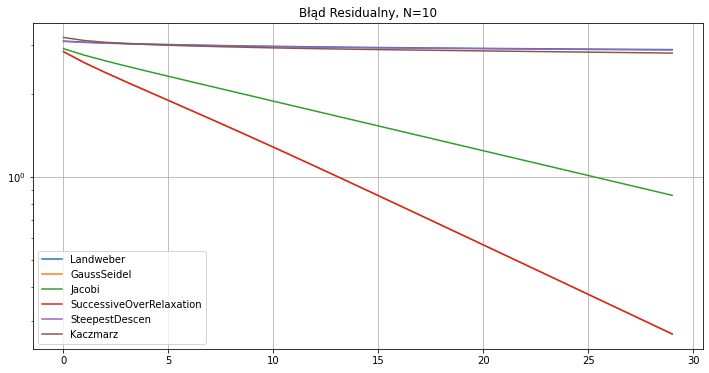

Wynikia dla N=100:
Czas wykonania metodą Landweber: 10373.728 ms
Czas wykonania metodą GaussSeidel: 2296.243 ms
Czas wykonania metodą Jacobi: 1123.596 ms
Czas wykonania metodą SuccessiveOverRelaxation: 2305.343 ms
Czas wykonania metodą SteepestDescen: 1735.769 ms
Czas wykonania metodą Kaczmarz: 67545.266 ms


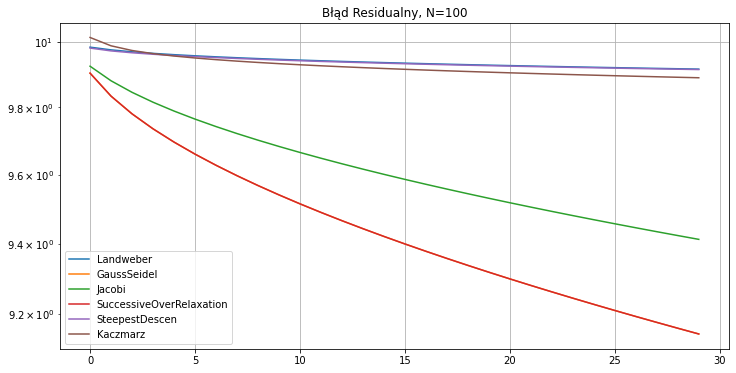

Wynikia dla N=1000:
Czas wykonania metodą Landweber: 1533450.35 ms
Czas wykonania metodą GaussSeidel: 529606.035 ms
Czas wykonania metodą Jacobi: 64942.071 ms
Czas wykonania metodą SuccessiveOverRelaxation: 535792.409 ms
Czas wykonania metodą SteepestDescen: 63211.242 ms
Czas wykonania metodą Kaczmarz: 502240.212 ms


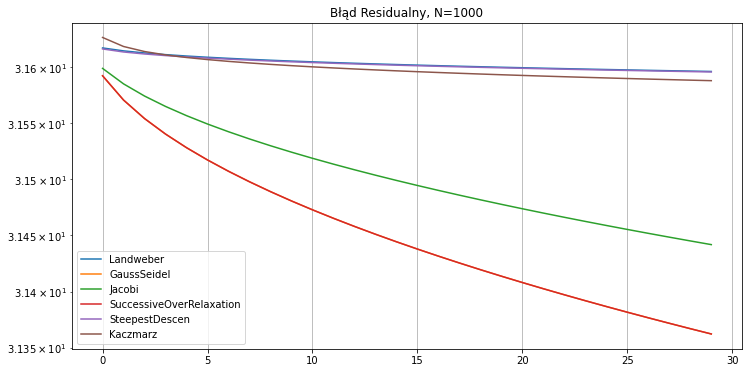

In [88]:
N = [10**i for i in range(1,4)]
A = [np.zeros((n,n)) for n in N]
for i in range(len(N)):
    np.fill_diagonal(A[i], 2)
    np.fill_diagonal(A[i][1:], -np.ones(N[i]-2))
    np.fill_diagonal(A[i][:,1:], -np.ones(N[i]-2))
b = [np.ones(n).reshape(n,1) for n in N]

x_solve = [np.linalg.inv(A[i])@b[i] for i in range(len(N))]

methods = [testMethods(A[i],b[i],x_solve[i],30) for i in range(len(N))]

for i in range(len(N)):
    print(f'Wynikia dla N={N[i]}:')
    iter_ = iterative_methods[m]['Value'].shape[0]
    for m in methods[i]:
        print(f'Czas wykonania metodą {m}: {methods[i][m]["Time"]/1000} ms')
        plt.semilogy(range(methods[i][m]['Value'].shape[0]),methods[i][m]['Error']['Residual'], label=m)
    plt.title(f'Błąd Residualny, N={N[i]}')
    plt.grid()
    plt.legend()
    plt.show()

### Wnioski

Przy dobrze uwarunkowanej macierzy (przekątno dominującej) wszystkie algorytmy zapewniają zbieżność.
Najlepsze pod względem minimalizacji błędu residualnego są metody Jacobiego, SOR oraz GaussSeidel.
Wraz ze wzrostem wymiarów macierzy jak w zadaniu powyżej najmniejsze zapotrzebowanie na zasoby wymaga metoda SteepestDescen. Przy tak uwarunkowanej macierzy metoda Jacobiego przy podobnym zapotrzebowaniu na zasoby dostarcza wyniki obarczone mniejszym błędem residulanym.

---
## Zadanie 6
Niech Ax = b , gdzie $A = I_n \otimes C^T C$ , symbol $\otimes$ oznacza iloczyn Kroneckera, $I_N \in R^{NxN}$ jest macierzą jednostkową, $C \in R^{MxM}$ jest macierzą losową wygenerowaną z rozkładu równomiernego (rand), M = 200, N= 30, oraz $x~N(0, I_{M,N} )$ (rozkład normalny - randn).
Porównaj na jednym rysunki krzywe błędu residualnego uzyskane różnymi metodami iteracyjnymi, a na drugim rysunku krzywe błędu aproksymacji rozwiązania. Porównaj czas wykonywania się algorytmów.

Wskaźnik uwarunkowania macierzy 14321627.876816593

Landweber czas wykonania 50 iteracji: 11000613.749 ms
GaussSeidel czas wykonania 50 iteracji: 6343610.144 ms
Jacobi czas wykonania 50 iteracji: 402608.763 ms
SuccessiveOverRelaxation czas wykonania 50 iteracji: 8191096.733 ms
SteepestDescen czas wykonania 50 iteracji: 745723.225 ms
Kaczmarz czas wykonania 50 iteracji: 2065248.251 ms

 Parametry: alpha=1 dla metody Kaczmarza, omega=1 dla metody Steepest-Descen


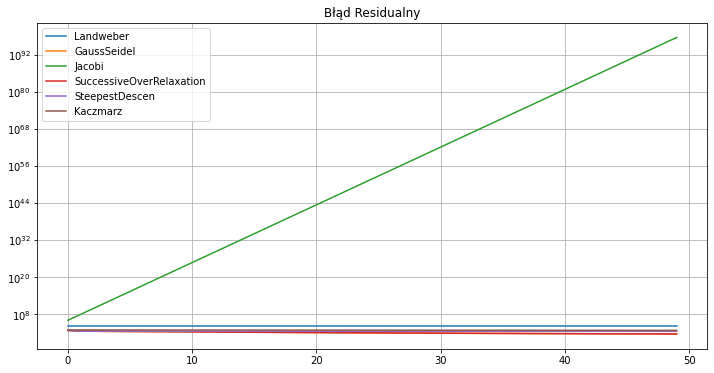

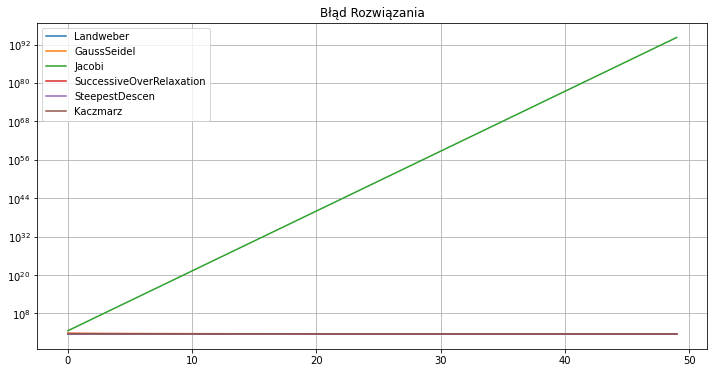

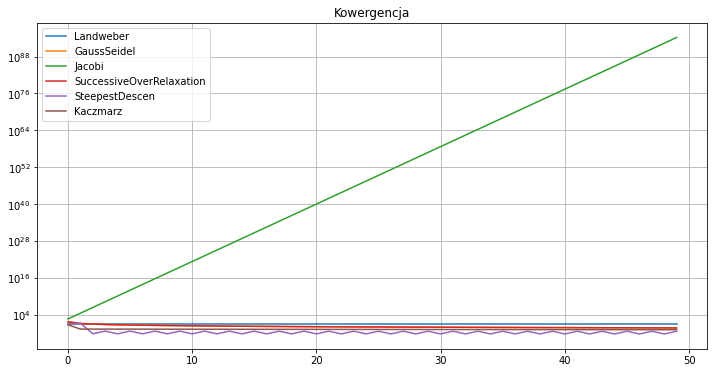

In [13]:
M = 100
N = 20
C = np.random.rand(M,M)
I = np.eye(N)
A = np.kron(I, C.T@C)
x_solve = np.random.randn(M*N).reshape(M*N,1)
b = A@x_solve

iterative_methods = testMethods(A,b,x_solve,50)

print(f'Wskaźnik uwarunkowania macierzy {np.linalg.cond(A)}')
print()

for m in iterative_methods:
    iter_ = iterative_methods[m]['Value'].shape[0]
    print(f'{m} czas wykonania {iter_} iteracji: {iterative_methods[m]["Time"]/1000} ms')
    
print("\n Parametry: alpha=1 dla metody Kaczmarza, omega=1 dla metody Steepest-Descen")

drawPlots(iterative_methods, log=True)

### Wnioski

Jak w poprzednich zadaniach metoda SteepestDescen przy dużych macierzach wymaga najmniejszych zasobów, jednak z większym błędem. Metoda Kaczmarza w przypadku tego rówaniania macierzowego (o wysokim wskaźniku uwarunkowania) wymagała mniejszych zasobów 3-4 krotnie od GaussSeidel oraz SOR. Metoda Jacobiego rozbieżna. 